# Mahfuz Rahman
##Student No.: 217847518
### EECS4421 Lab 6


In [113]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

# using this library for running on Colab
from google.colab.patches import cv2_imshow

In [115]:
n_image = 1000

def save_Q(Q):
    global n_image
    image = np.zeros((700, 700))  # Updated to 700x700 for a 7x7 maze
    for idx in range(49):  # 7x7 = 49 states
        i = int(idx / 7)
        j = idx % 7
        v = max(Q[idx])
        z = (v + 1000) / 1500
        z = max(0, min(1, z))  # Normalize value to [0, 1]
        for k in range(100):
            for l in range(100):
                image[i * 100 + k][j * 100 + l] = z
    image = 255 * image
    img = image.astype(np.uint8)

    # Uncomment if running the code on local machine and not colab
    #cv2.imshow("image", img)
    cv2_imshow(img)

    cv2.waitKey(10)
    # Uncomment for output
    # cv2.imwrite(f"pic_{n_image}.jpg", img)
    n_image += 1

def init_Q():
    Q = []
    for i in range(49):  # 7x7 = 49 states
        x = [0, 0, 0, 0]
        Q.append(x)
    return Q

def reset():
    return 0

def state_to_row_col(s):
    return [int(s / 7), s % 7]

In [116]:
def execute_action(maze, s, a):
    sp = [s[0] + a[0], s[1] + a[1]]
    isp = sp[0] * 7 + sp[1]
    idxs = s[0] * 7 + s[1]

    if (sp[0] < 0) or (sp[1] < 0) or (sp[0] >= 7) or (sp[1] >= 7):
        return idxs, -100, False
    if maze[sp[0]][sp[1]] == 0:
        return isp, -1, False
    elif maze[sp[0]][sp[1]] == 1:
        return idxs, -100, False
    elif maze[sp[0]][sp[1]] == 10:
        return isp, 500, True
    print(f"Should not happen {s} {sp} {a} {maze}")
    sys.exit(1)

In [117]:
# Fixed parameters
n_episodes = 300
max_episode_length = 50
alpha = 0.2
gamma = 0.7

In [118]:
def q_learning(maze, actions, epsilon):
    rewards = []
    Q = init_Q()
    for e in range(n_episodes):
        s = reset()
        reward = 0

        for t in range(max_episode_length):
            if np.random.uniform(0, 1) < epsilon:
                a = np.random.randint(4)
            else:
                a = np.argmax(Q[s])

            sp, R, done = execute_action(maze, state_to_row_col(s), actions[a])
            Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R + gamma * max(Q[sp]))
            reward += R
            if done:
                break
            s = sp
        rewards.append(reward)

        # save_Q(Q)
    return rewards, Q

In [120]:
# Define the 7x7 maze
maze = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 0, 1, 1],
    [0, 10, 0, 0, 0, 0, 0]
])

actions = [[0, 1], [1, 0], [0, -1], [-1, 0]]

In [121]:
rewards, q = q_learning(maze, actions, epsilon=0.1)

In [122]:
for i, r in enumerate(rewards):
    print(f"{i}, {r}")
print(q)

0, -2228
1, -1139
2, -644
3, -545
4, -545
5, -644
6, -347
7, -644
8, -545
9, 64
10, -446
11, 362
12, -545
13, -248
14, -842
15, 264
16, -149
17, 272
18, 364
19, -446
20, 382
21, 372
22, 378
23, 268
24, 480
25, 282
26, 272
27, 482
28, 78
29, 474
30, 474
31, 486
32, 482
33, 484
34, 280
35, 484
36, 386
37, 482
38, 486
39, 484
40, 486
41, 482
42, 486
43, 482
44, 286
45, 286
46, 486
47, 486
48, 484
49, 286
50, 484
51, 386
52, 184
53, 286
54, 384
55, 486
56, 386
57, 384
58, 486
59, 486
60, 384
61, 384
62, 384
63, 384
64, 386
65, 486
66, 286
67, 486
68, 486
69, 386
70, 484
71, 486
72, 484
73, 382
74, 484
75, 86
76, 186
77, 482
78, 384
79, 484
80, 184
81, 384
82, 384
83, 284
84, 184
85, 386
86, 486
87, 484
88, 384
89, 484
90, 486
91, 386
92, 486
93, 486
94, 386
95, 386
96, 386
97, 384
98, 380
99, 386
100, 384
101, 284
102, 386
103, 386
104, 380
105, 486
106, 286
107, 382
108, 386
109, 486
110, 286
111, 486
112, 282
113, 286
114, 486
115, 386
116, 486
117, 384
118, 386
119, 386
120, 484
121, 28

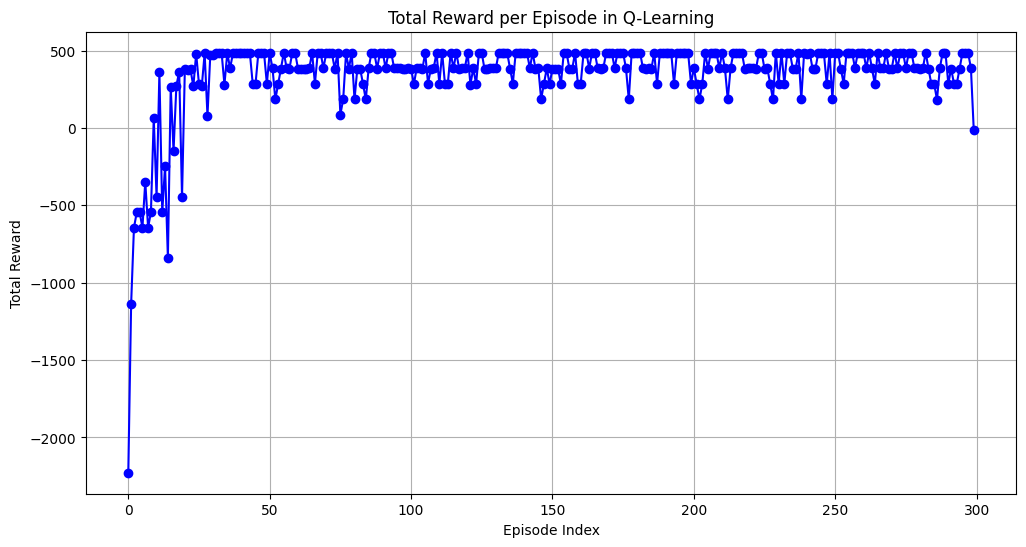

In [123]:
episode_indices = list(range(300))
plt.figure(figsize=(12, 6))
plt.plot(episode_indices, rewards, marker='o', linestyle='-', color='b')
plt.title('Total Reward per Episode in Q-Learning')
plt.xlabel('Episode Index')
plt.ylabel('Total Reward')
plt.grid()
plt.show()



---



1. ```Using an epsilon greedy exploration strategy and with fixed learning and future discount reward parameters, for a  given map world, solve the task.  Keep the number of interaction steps per interaction and number of interactions fixed. Now choose different fixed epsilon values 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64 and run your code. If you plot the reward as a function of step size, what do you see?```

In [128]:
def plotDifferentEpsilon(epsilon_values):

  # Plotting rewards for each epsilon value
  plt.figure(figsize=(10, 3))

  # Running Q-learning for each epsilon value and collecting rewards
  for epsilon in epsilon_values:
      rewards, q = q_learning(maze, actions, epsilon)
      plt.plot(range(300), rewards, label=f'Epsilon: {epsilon}')

  plt.xlabel('Episode Index')
  plt.ylabel('Total Reward')
  plt.legend()
  plt.grid()
  plt.show()

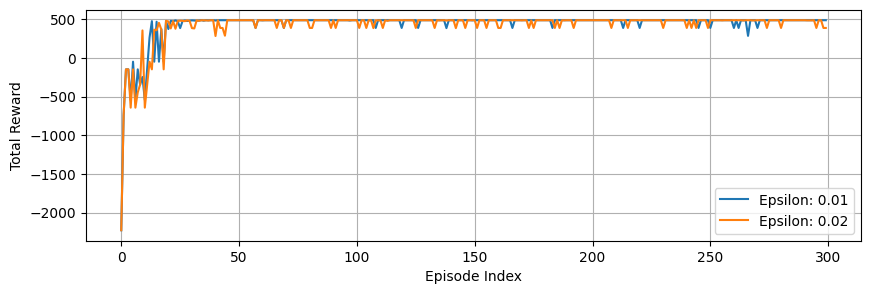

In [129]:
epsilon_values = [0.01, 0.02]
plotDifferentEpsilon(epsilon_values)

**Low Epsilon Values (e.g., 0.01, 0.02):**

These values represent a high level of exploitation. So the the agent relies mostly on its learned Q-values and explores less. Therefore, it might take longer to discover optimal paths, leading to lower initial rewards but potentially higher stability in later episodes as it learns.



---



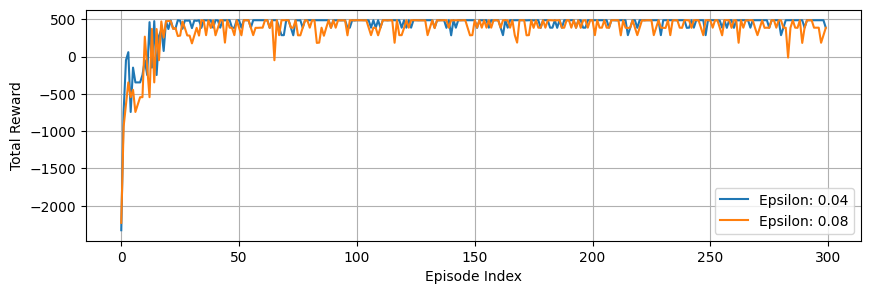

In [132]:
epsilon_values = [0.04, 0.08]
plotDifferentEpsilon(epsilon_values)

**Medium Epsilon Values (e.g., 0.04, 0.08):**

These provide a balanced approach between exploration and exploitation. The agent shows a gradual increase in rewards as it explores different actions and learns more about the maze.



---



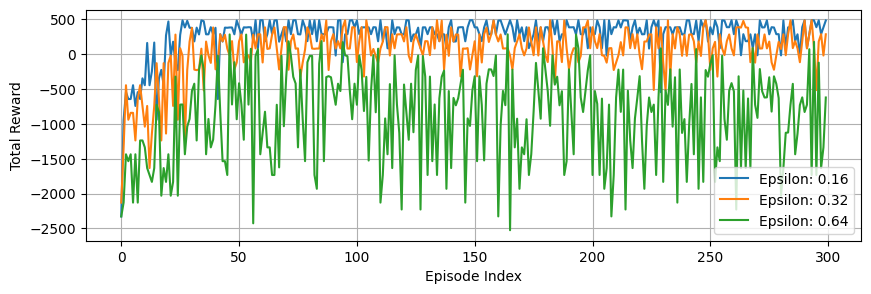

In [133]:
epsilon_values = [0.16, 0.32, 0.64]
plotDifferentEpsilon(epsilon_values)

**High Epsilon Values (0.16, 0.32, 0.64):**

At these levels, the agent explores a lot, which is leading to a more erratic learning curve as seen above. The agent frequently takes suboptimal actions, leading to lower total rewards in the initial episodes.



---



2. ```A common strategy to deal with a fixed epsilon is known as 'epsilon decay' where the value of epsilon is fixed for a given episode but then is made to decay to zero over multiple episodes. One can do this in many ways. A simple way is to multiply epsilon by a number r<1 after each episode (although this can decrease epsilon too quickly). Start at some epsilon0 (say 0.9) and try different r's. Plot some representative reward curves over your baseline from above.```


In [134]:
def q_learning_1(maze, actions, epsilon, r):
    rewards = []
    Q = init_Q()

    for e in range(n_episodes):
        s = reset()
        reward = 0

        for t in range(max_episode_length):
            if np.random.uniform(0, 1) < epsilon:
                a = np.random.randint(4)
            else:
                a = np.argmax(Q[s])

            sp, R, done = execute_action(maze, state_to_row_col(s), actions[a])
            Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R + gamma * max(Q[sp]))
            reward += R

            if done:
                break
            s = sp

        rewards.append(reward)

        epsilon *= r
    return rewards, Q

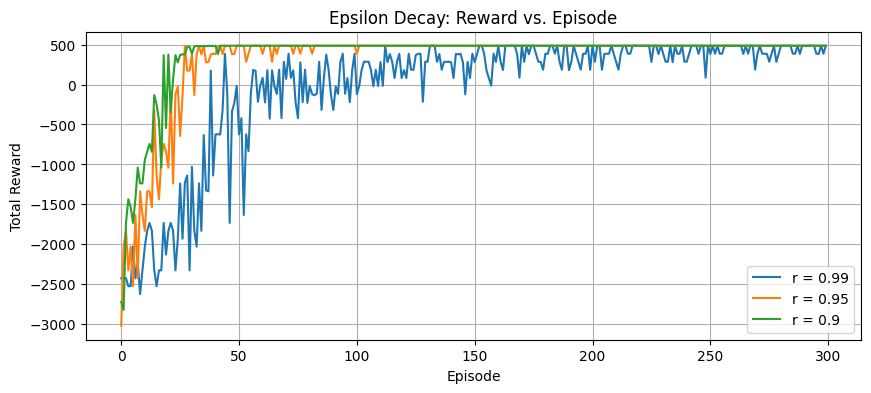

In [135]:
epsilon = 0.9
r_values = [0.99, 0.95, 0.9]

plt.figure(figsize=(10, 4))

for r in r_values:
    rewards, q = q_learning_1(maze, actions, epsilon, r)
    plt.plot(range(n_episodes), rewards, label=f'r = {r}')

plt.title('Epsilon Decay: Reward vs. Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.show()

The effects of Decay Rates:

For Decay Rate 0.99, the agent starts with a relatively high epsilon (0.9) and decays it slowly. As a result, it maintains a good level of exploration throughout training, leading to a more stable and generally higher total reward over episodes.

Decay Rate 0.95 results in a slightly faster decay of epsilon compared to 0.99. The agent still manages to explore effectively but may begin to stabilize its rewards sooner, reflecting less exploration towards the end of the training.

Lastly, for Decay Rate 0.90, the agent transitions to exploitation more quickly and with a more rapid decay of epsilon. This can lead to a suboptimal policy if the agent has not fully explored the maze, resulting in lower total rewards overall.



---



3. ```One fix to the epsilon value would be to use an epsilon value = r^n * epsilon1 + epsilon0. [never let epsilon decay below epsilon0]. Try this. How does it change performance```

In [136]:
def q_learning_2(maze, actions, epsilon1, epsilon0, r):
    rewards = []
    Q = init_Q()

    for e in range(n_episodes):
        epsilon = (r**e) * epsilon1 + epsilon0 # r^n * epsilon1 + epsilon0

        s = reset()
        reward = 0

        for t in range(max_episode_length):
            if np.random.uniform(0, 1) < epsilon:
                a = np.random.randint(4)
            else:
                a = np.argmax(Q[s])

            sp, R, done = execute_action(maze, state_to_row_col(s), actions[a])
            Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R + gamma * max(Q[sp]))
            reward += R

            if done:
                break
            s = sp

        rewards.append(reward)
    return rewards, Q

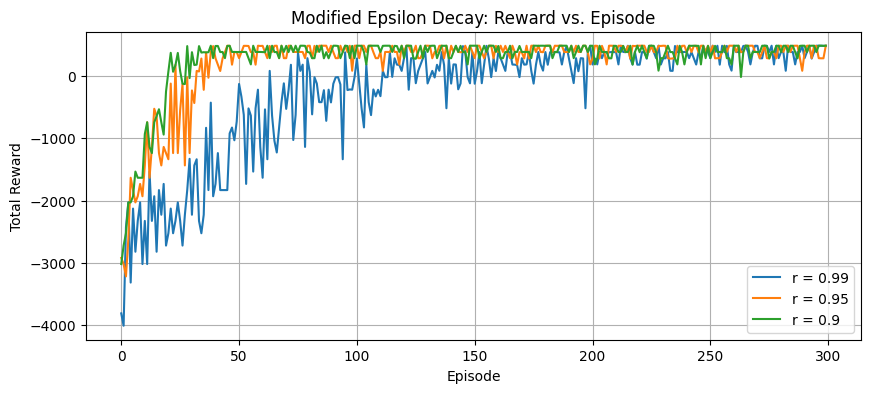

In [137]:
epsilon1 = 0.9  # Initial exploration rate
epsilon0 = 0.1  # Minimum exploration rate
r_values = [0.99, 0.95, 0.9]

plt.figure(figsize=(10, 4))

for r in r_values:
    rewards, q = q_learning_2(maze, actions, epsilon1, epsilon0, r)
    plt.plot(range(n_episodes), rewards, label=f'r = {r}')

plt.title('Modified Epsilon Decay: Reward vs. Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.show()

Upon not letting the epsilon value getting below epsilon0, the agent maintains some level of exploration throughout training, which can help it discover optimal strategies more effectively. So with the ability to continue exploring new actions, the agent may improve its learning and converge further later to optimal policies.



---



4. ```Q-learning for fixed motion and fixed rewards does not highlight the full range of the performance of the algorithm. Introduce stochastic motion to your agent by having the agent do what is required (move up, down, left, right) p % if the time, but (100-p) % of the time it moves randomly over all other possible motions. Returning to your baseline, train on a given p (say 10%) and then performance  with p=0,5,10,15,20.```

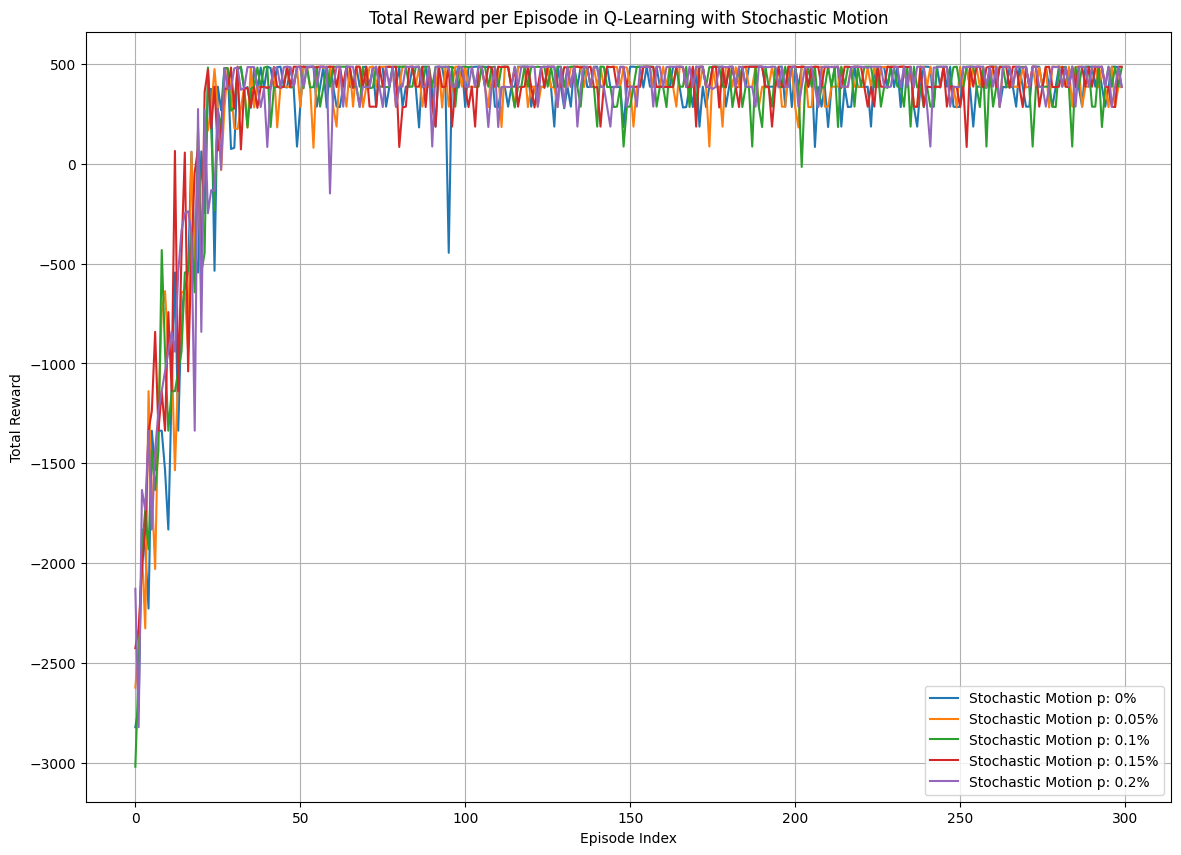

In [208]:
# Implementing stochastic motion for the Q-learning agent

def stochastic_execute_action(maze, s, a, p):
    """
    Executes the specified action with probability p, otherwise moves randomly.
    """
    if np.random.uniform(0, 1) < p:  # With probability p, take the specified action
        return execute_action(maze, s, a)
    else:  # With probability (100 - p), move randomly
        random_action = np.random.randint(4)
        return execute_action(maze, s, actions[random_action])

def q_learning_with_stochastic_motion(maze, actions, epsilon1, epsilon0, r, p):
    rewards = []
    Q = init_Q()  # Initialize Q-table
    for e in range(n_episodes):
        s = reset()  # Start from initial state
        reward = 0

        epsilon = (r**e) * epsilon1 + epsilon0 # r^n * epsilon1 + epsilon0

        for t in range(max_episode_length):

            if np.random.uniform(0, 1) < epsilon:
                # Stochastic action selection based on probability p
                if np.random.uniform(0, 1) < p:  # Move as intended
                    a = np.argmax(Q[s])
                else:  # Move randomly
                    a = np.random.randint(4)
            else:
                # Exploit the learned policy
                a = np.argmax(Q[s])  # Best action

            sp, R, done = execute_action(maze, state_to_row_col(s), actions[a])

            # Update Q-values
            Q[s][a] = (1 - alpha) * Q[s][a] + alpha * (R + gamma * max(Q[sp]))
            reward += R
            if done:
                break
            s = sp  # Move to the new state

        rewards.append(reward)

        #save_Q(Q)
    return rewards, Q



epsilon1 = 0.9
epsilon0 = 0.1
r_values = [0.99, 0.95, 0.9]
p_values = [0, 0.05, 0.10, 0.15, 0.20]

plt.figure(figsize=(14, 10))

for p in p_values:
    rewards, q = q_learning_with_stochastic_motion(maze, actions, epsilon1, epsilon0, r, p)
    plt.plot(range(n_episodes), rewards, label=f'Stochastic Motion p: {p}%')

plt.title('Total Reward per Episode in Q-Learning with Stochastic Motion')
plt.xlabel('Episode Index')
plt.ylabel('Total Reward')
plt.legend()
plt.grid()
plt.show()



---



I introduced stochastic action based on the following strategy:

If rand < 𝜖, use stochastic motion:
*   Decide to perform the intended action with probability
*   With probability 1 - p, select a random action

If rand >= 𝜖, follow the learned policy by selecting the action with the highest Q-value.

The results show a much more realistic learning strategies.